<a href="https://colab.research.google.com/github/kigit2017/Houe-price-prediction/blob/main/SeoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load csv Bike data into dataframe

In [47]:
data = pd.read_csv('/content/SeoulBikeData.csv')

The data ste has 14 columns and 8760 rows.

In [48]:
data.shape

(8760, 14)

In [49]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Filter out numerical values

In [50]:
df = data.select_dtypes(include =['float64','int64'])
df.shape
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


Get info to get the mean ,std, quartile values.

All column count are the same. There should be no missing values.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


Describe the dataset to find the min,maximum of bike count.
Solar Radiation,Rainfall and Snowfall have outliers present in the data, because the maximum - 75 % is higher and  farther from the mean.

In [52]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Remove missing values from the columns. We checked there are no missing values in the data.

In [53]:
miss_val=df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

Fill training and test data from dataset  rows

> Indented block



In [54]:
df_train = df[:4380]
df_train.shape
df_test = df[4380:]
df_test.shape

(4380, 10)

Find correlation for bike columns. The features that have higher correlated values affects the bike rent count.

In [58]:
data_corr=data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


Get correlated values of columns which have values >.6 for rented bike count.There no features that are greatly affecting the bike rental.

In [56]:
data_corr=data_corr['Rented Bike Count'][:-1]
data_corr
#data_corr[abs(data_corr)>.6].sort_values(ascending=False)

Rented Bike Count           1.000000
Hour                        0.410257
Temperature(C)              0.538558
Humidity(%)                -0.199780
Wind speed (m/s)            0.121108
Visibility (10m)            0.199280
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Rainfall(mm)               -0.123074
Name: Rented Bike Count, dtype: float64

Plot correlation beween the variables using Heat Map.

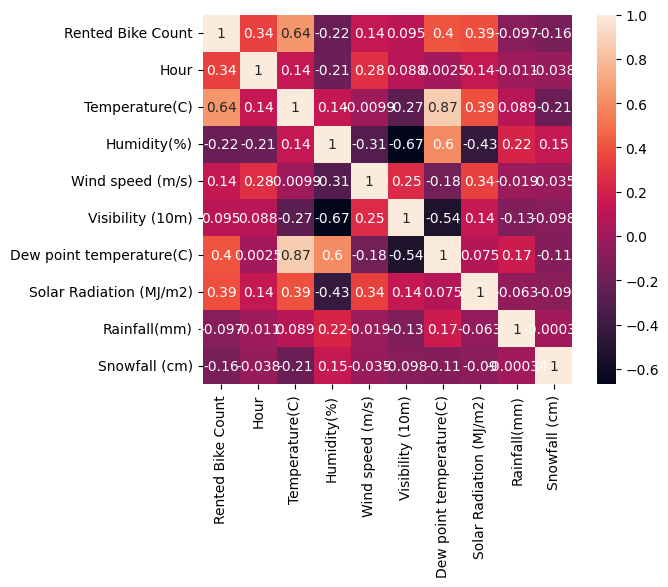

In [57]:
corr = df_train.corr()
sns.heatmap(corr,annot = True,square=True)
plt.show()

Train and test from training data is split 80 20.

In [59]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(df_train,test_size=.20)

In [60]:
train.shape

(3504, 10)

In [61]:
val.shape

(876, 10)

X,Y values are created with bike_rental count and without the count

In [63]:
train_x = train.drop(['Rented Bike Count'],axis = 1)
train_y = train['Rented Bike Count']

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

Linear Regression is used for model fitting the data with the training data of x AND y.

In [64]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(train_x,train_y)

LinearRegression()

Predict the value of x FOR TEST and compare it with the expected value of x

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_pred = model1.predict(val_x)



The R2 score is .29 which is lower to the predicted value and the Model Performance score is lower due to lower correlation.

In [66]:
print(mean_absolute_error(df_pred,val_y))
print(mean_squared_error(df_pred,val_y))
print(r2_score(df_pred,val_y))

238.6257459785938
115253.92824228128
0.29158897923672245
